# **Irene Dovichi** 
## Midterm 1 - Assignment 5
Perform image segmentation on all images in the dataset, using the normalized cut algorithm running on the top of superpixels rather than on raw pixels. For each image compute an accuracy metric (which one it is up to you to decide) measuring the overlap between the segments identified by NCUT and the ground truth horse semantic segmentation. Provide a table summarizing the average segmentation accuracy on all images, plus present 2 examples of images that are well-segmented (according to the above defined metric).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation, color, graph, io
import os

## Dataset Loading
All the original images of the Weizmann Horse Database (link: www.kaggle.com/datasets/ztaihong/weizmann-horse-database/data) are saved in the list `images`. 

The corresponding masks are saved in the list `masks`.

In [2]:
path = './weizmann_horse_db/horse'
images = []
for file in sorted(os.listdir(path)):
    if os.path.isfile(os.path.join(path, file)):
        images.append(io.imread(os.path.join(path, file)))

In [3]:
path = './weizmann_horse_db/mask'
masks = []
for file in sorted(os.listdir(path)):
    if os.path.isfile(os.path.join(path, file)):
        masks.append(io.imread(os.path.join(path, file)))

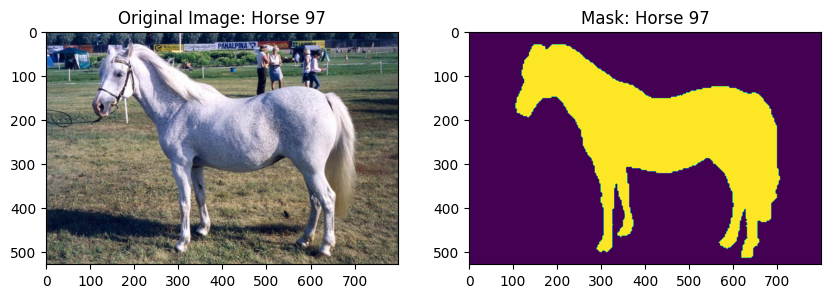

In [4]:
# print element m of `images` and the corresponding element of `masks`
m = 97

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(images[m])
plt.title(f'Original Image: Horse {m}')

plt.subplot(1, 2, 2)
plt.imshow(masks[m])
plt.title(f'Mask: Horse {m}')
plt.show()

## Segmentation
The skimage implementation of SLIC algorithm was used to generate the superpixels of images. The parameters I focused on were:
- `compactness`, for which I tried the values: 0.01, 0.1, 1, 10
- `sigma`, for which I tried: 0, 1, 10, 100
I also tried the zero parameter version SLICO.

In [ ]:
# 2 prove: 
# 1. converto immagini in bianco e nero e applico segmentation, ncut, accuracy
# 2. applico ncut direttamente sulle immagini a colori

In [ ]:
# control various values of the compactness parameter
# then refine

In [ ]:
# tries for sigma

In [ ]:
# zero-parameters version

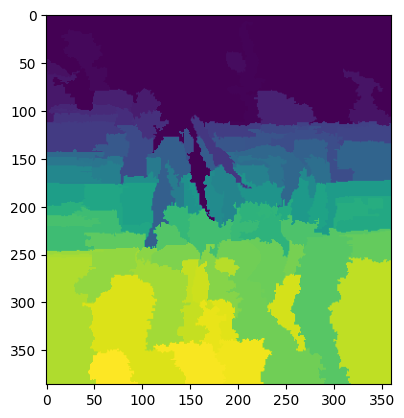

In [5]:
# find 500 superpixel for the image 
segments = segmentation.slic(images[109], n_segments=500, compactness=1, sigma=0)

plt.imshow(segments)

In [36]:
# observation: the number of chosen superpixel will be approximated, in this case we asked for 500 and it produces 418
len(np.unique(segments))

418

In [37]:
segments

array([[  1,   1,   1, ...,  19,  19,  19],
       [  1,   1,   1, ...,  19,  19,  19],
       [  1,   1,   1, ...,  19,  19,  19],
       ...,
       [415, 415, 415, ..., 400, 400, 400],
       [415, 415, 415, ..., 400, 400, 400],
       [415, 415, 415, ..., 400, 400, 400]])

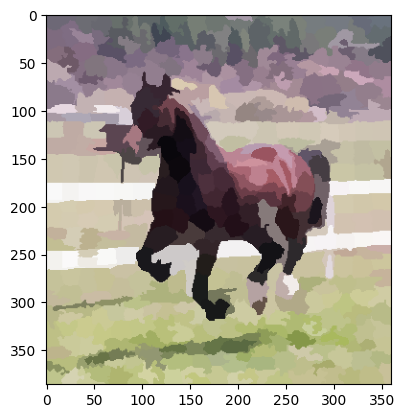

In [45]:
# use average of the pixels in the corresponding superpixel to color the superpixel
colored = color.label2rgb(segments, images[109], kind='avg')
plt.imshow(colored)

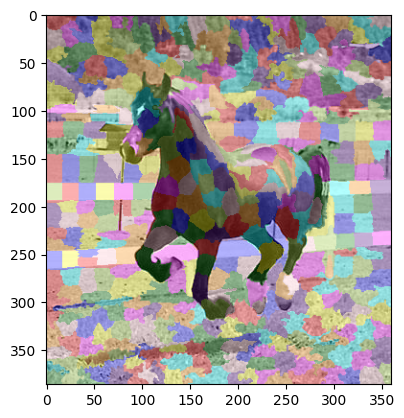

In [39]:
# use a predefined palette to color the superpixel and show it over the original image
colored_overlay = color.label2rgb(segments, images[109], kind='overlay')
plt.imshow(colored_overlay)

In [ ]:
# create a graph with the superpixel: in skimage.graph there also two variants (boundary, mean_color)
rag = graph.RAG(segments)

In [42]:
# mean color of the superpixel
# si puo anche provare mode = distance
rag_mean = graph.rag_mean_color(images[109], segments, mode='similarity')
print(rag_mean)

RAG with 418 nodes and 1178 edges


In [46]:
print(graph.rag_mean_color(images[109], colored, mode='similarity'))
# nota che sono molti meno i colori se gli diamo colored invece di segments... sono esattamente len(np.unique(colored))
# provare anche cosi

RAG with 221 nodes and 5346 edges


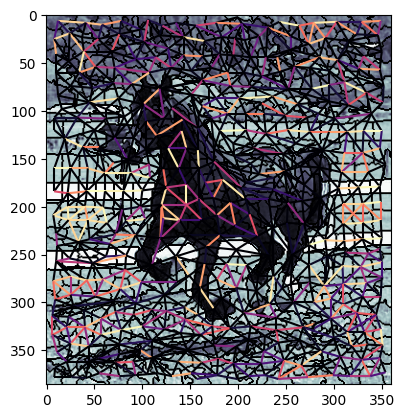

In [48]:
# show the graph over the original image
graph.show_rag(segments, rag_mean, images[109])

In [49]:
# we can apply ncut to the graph to obtain a segmentation
cut = graph.cut_normalized(segments, rag_mean)
# si puo anche scegliere n, il numero di cuts da effettuare

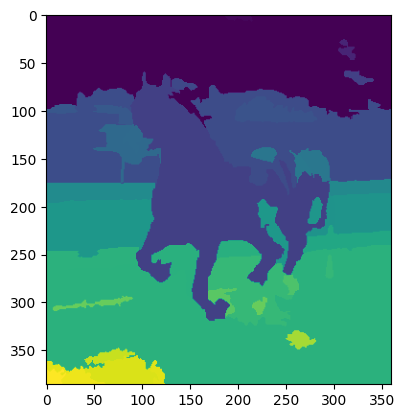

In [50]:
plt.imshow(cut)

In [ ]:
# siccome si dovra paragonare alla maschera binaria, dobbiamo trovare un modo (magari con una threshold) 
# per avere solo 2 colori nell'immagine sopra, e poi valutare quanto si e fatto bene

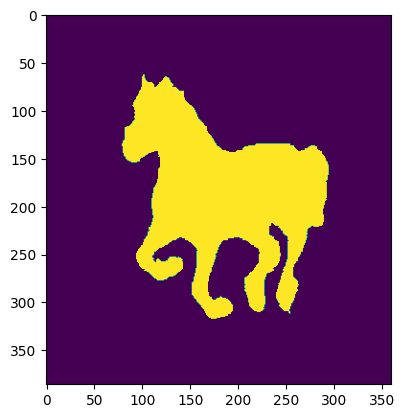

In [52]:
# print the corresponding mask
plt.imshow(masks[109])

## Valutation

## Results & Analysis

## Personal Considerations

In [ ]:
# fun things, weak aspects, possible ways to enhance the analysis, etc.